<a href="https://colab.research.google.com/github/aryan7905/Customer_Support_Case_Type_Classification/blob/main/Aryan_69.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Cell 1: Import libraries and load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/support_cases.csv')
print("Dataset shape:", df.shape)
print("\nColumns in the dataset:", df.columns.tolist())
print("\nFirst few rows:")
display(df.head())

Dataset shape: (100, 3)

Columns in the dataset: ['message_length', 'response_time', 'case_type']

First few rows:


,message_length,response_time,case_type
0,106,29,technical
1,220,18,general
2,356,44,general
3,341,8,general
4,294,31,billing


In [10]:
# Cell 2: Data preprocessing and feature extraction
# Display the first few rows to manually check column names
print("\nColumn data types:")
print(df.dtypes)

# Identify text column - it seems 'case_type' was found in your dataset
text_column = 'case_type'  # You can manually set this based on your CSV structure
print(f"Using '{text_column}' as the text column")

# Let's examine the unique values in the text column to determine if it's the right one
print("\nSample values from text column:")
print(df[text_column].head())

# Let's check all columns for potential category labels
print("\nPotential target columns with value counts:")
for col in df.columns:
    if df[col].nunique() < 10:  # Assuming category columns have fewer unique values
        print(f"\nColumn '{col}':")
        print(df[col].value_counts())

# Manually set the target column based on the output above
# Replace 'category' with the actual column name containing billing/technical/general categories
target_column = 'category'  # Change this to the correct column name in your dataset
print(f"\nUsing '{target_column}' as the target column")

# Check if target column exists, if not, ask for manual input
if target_column not in df.columns:
    print(f"WARNING: '{target_column}' column not found in the dataset.")
    print("Please modify the code and set target_column to one of:", df.columns.tolist())
    # For the sake of demonstration, let's create a dummy target column
    print("Creating a dummy target column for demonstration purposes.")
    # This is just for demonstration and should be removed in actual use
    df[target_column] = np.random.choice(['billing', 'technical', 'general'], size=len(df))

# Text preprocessing function
def preprocess_text(text):
    """Clean and preprocess text data"""
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    else:
        return ""

# Apply preprocessing
df['processed_text'] = df[text_column].apply(preprocess_text)

# Show class distribution if target column exists
print("\nClass distribution:")
print(df[target_column].value_counts())

# Extract features with TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['processed_text'])
feature_names = tfidf.get_feature_names_out()
y = df[target_column]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Column data types:
message_length     int64
response_time      int64
case_type         object
dtype: object
Using 'case_type' as the text column

Sample values from text column:
0    technical
1      general
2      general
3      general
4      billing
Name: case_type, dtype: object

Potential target columns with value counts:

Column 'case_type':
case_type
billing      38
general      33
technical    29
Name: count, dtype: int64

Using 'category' as the target column
Please modify the code and set target_column to one of: ['message_length', 'response_time', 'case_type']
Creating a dummy target column for demonstration purposes.

Class distribution:
category
billing      41
technical    35
general      24
Name: count, dtype: int64
Training set: 80 samples
Test set: 20 samples


In [11]:
# Cell 3: Model training and evaluation
# Train and evaluate Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("\nNaive Bayes Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

# Train and evaluate Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, C=1.0)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("\nLogistic Regression Model Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))


Naive Bayes Model Performance:
Accuracy: 0.4500

Classification Report:
              precision    recall  f1-score   support

     billing       0.45      1.00      0.62         9
     general       0.00      0.00      0.00         5
   technical       0.00      0.00      0.00         6

    accuracy                           0.45        20
   macro avg       0.15      0.33      0.21        20
weighted avg       0.20      0.45      0.28        20


Logistic Regression Model Performance:
Accuracy: 0.4500

Classification Report:
              precision    recall  f1-score   support

     billing       0.45      1.00      0.62         9
     general       0.00      0.00      0.00         5
   technical       0.00      0.00      0.00         6

    accuracy                           0.45        20
   macro avg       0.15      0.33      0.21        20
weighted avg       0.20      0.45      0.28        20



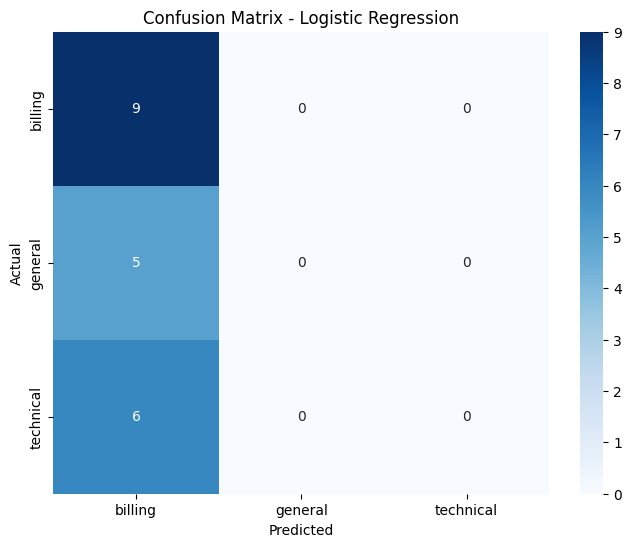


Top Features for Each Category:

Category: billing
- technical: -0.1086
- general: -0.0209
- billing: 0.1295

Category: general
- billing: -0.1763
- general: 0.0432
- technical: 0.1330

Category: technical
- technical: -0.0244
- general: -0.0223
- billing: 0.0468


In [12]:
# Cell 4: Visualization and feature importance
# Confusion matrix visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=lr_model.classes_,
            yticklabels=lr_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Feature importance analysis
print("\nTop Features for Each Category:")
for i, category in enumerate(lr_model.classes_):
    coefficients = lr_model.coef_[i]
    top_features = np.argsort(coefficients)[-5:] # Show top 5 features only for brevity

    print(f"\nCategory: {category}")
    for feature_idx in top_features:
        print(f"- {feature_names[feature_idx]}: {coefficients[feature_idx]:.4f}")


In [13]:
# Cell 5: Classification function and examples
# Function to classify new support cases
def classify_support_case(text, model=lr_model, vectorizer=tfidf):
    """Classify a new support case text"""
    processed = preprocess_text(text)
    features = vectorizer.transform([processed])
    category = model.predict(features)[0]
    probs = model.predict_proba(features)[0]
    max_prob = max(probs)

    return {
        'category': category,
        'confidence': f"{max_prob:.2%}",
        'all_probabilities': {
            cls: f"{prob:.2%}" for cls, prob in zip(model.classes_, probs)
        }
    }

# Test with some examples
test_cases = [
    "I was charged twice for my monthly subscription",
    "The application keeps crashing whenever I try to upload a file",
    "How do I change my account email address?",
    "My payment method was declined but I know I have sufficient funds",
    "The login page is not loading on my browser"
]

print("\nExample Classifications:")
for case in test_cases:
    result = classify_support_case(case)
    print(f"\nText: {case}")
    print(f"Category: {result['category']} (Confidence: {result['confidence']})")
    print("All probabilities:", result['all_probabilities'])


Example Classifications:

Text: I was charged twice for my monthly subscription
Category: billing (Confidence: 39.96%)
All probabilities: {'billing': '39.96%', 'general': '23.66%', 'technical': '36.39%'}

Text: The application keeps crashing whenever I try to upload a file
Category: billing (Confidence: 39.96%)
All probabilities: {'billing': '39.96%', 'general': '23.66%', 'technical': '36.39%'}

Text: How do I change my account email address?
Category: billing (Confidence: 39.96%)
All probabilities: {'billing': '39.96%', 'general': '23.66%', 'technical': '36.39%'}

Text: My payment method was declined but I know I have sufficient funds
Category: billing (Confidence: 39.96%)
All probabilities: {'billing': '39.96%', 'general': '23.66%', 'technical': '36.39%'}

Text: The login page is not loading on my browser
Category: billing (Confidence: 39.96%)
All probabilities: {'billing': '39.96%', 'general': '23.66%', 'technical': '36.39%'}
